<a href="https://colab.research.google.com/github/SARRAMBO/TelecomSalesDashboard/blob/main/TelecomSalesEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()

In [ ]:
#FETCH DATA-
df = pd.read_csv("/content/telecom_data.csv")
print(df)

             Alliance Partner Division  Alliance Partner Division Code  \
0                           7-11 - AUS                             656   
1                           7-11 - AUS                             656   
2                           7-11 - AUS                             656   
3                           7-11 - AUS                             656   
4                           7-11 - AUS                             656   
...                                ...                             ...   
201261  WOOLWORTHS GROCERY - AUSTRALIA                            1052   
201262  WOOLWORTHS GROCERY - AUSTRALIA                            1052   
201263  WOOLWORTHS GROCERY - AUSTRALIA                            1052   
201264  WOOLWORTHS GROCERY - AUSTRALIA                            1052   
201265  WOOLWORTHS GROCERY - AUSTRALIA                            1052   

       Card Partner Division                          Product  \
0         LEBARA - AUSTRALIA   LEBARA STARTER 

<ipython-input-12-9bcf6958c892>:2: DtypeWarning:

Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
#column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201266 entries, 0 to 201265
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Alliance Partner Division       201266 non-null  object 
 1   Alliance Partner Division Code  201266 non-null  int64  
 2   Card Partner Division           201266 non-null  object 
 3   Product                         201266 non-null  object 
 4   Store                           201266 non-null  object 
 5   Store Code                      201266 non-null  object 
 6   Date                            201266 non-null  object 
 7   Fiscal Week                     201266 non-null  int64  
 8   Month                           201265 non-null  float64
 9   Fiscal Year                     201265 non-null  float64
 10  Sales Units                     201265 non-null  float64
 11  Sales Amount-Non USD            201265 non-null  object 
 12  month           

In [ ]:
#COLUMN PROFILING-
#obtaining numerical columns info-
df.describe()
#obtaining categorical columns info-
df[df.dtypes[df.dtypes=="object"].index].describe()

,Alliance Partner Division,Card Partner Division,Product,Store,Store Code,Date,Sales Amount-Non USD,month
count,201266,201266,201266,201266,201266,201266,201265,201265
unique,12,2,21,5846,9342,219,330,8
top,WOOLWORTHS GROCERY - AUSTRALIA,VODAFONE SIM,VODAFONE SIM TRIPLE PUNCH 2AUD,Coles World Square - 00710,92007,4-8-2023,2.00,July
freq,82444,143606,27270,980,627,1124,44275,30586


In [ ]:
#Check for null values-
df.isnull().sum()

,Alliance Partner Division,Alliance Partner Division Code,Card Partner Division,Product,Store,Store Code,Date,Fiscal Week,Month,Fiscal Year,Sales Units,Sales Amount-Non USD,month,day,week_no,revenue
0,7-11 - AUS,656,LEBARA - AUSTRALIA,LEBARA STARTER KIT LG 39.90AUD,7ELEVEN-Yarraville1119 - 1119,01119,1-1-2023,202301,202301.0,2023.0,1.0,39.9,January,1.0,1.0,39.9
1,7-11 - AUS,656,LEBARA - AUSTRALIA,LEBARA STARTER KIT MED 29.90AUD,7ELEVEN-Melbourne Central1121 - 1121,01121,1-1-2023,202301,202301.0,2023.0,1.0,29.9,January,1.0,1.0,29.9
2,7-11 - AUS,656,LEBARA - AUSTRALIA,LEBARA STARTER KIT MED 29.90AUD,7ELEVEN-Haymarket2071 - 2071,02071,1-1-2023,202301,202301.0,2023.0,2.0,59.8,January,1.0,1.0,119.6
3,7-11 - AUS,656,LEBARA - AUSTRALIA,LEBARA STARTER KIT MED 29.90AUD,7 ELEVEN-02308 - 2308,02308,1-1-2023,202301,202301.0,2023.0,1.0,29.9,January,1.0,1.0,29.9
4,7-11 - AUS,656,LEBARA - AUSTRALIA,LEBARA STARTER KIT XS 14.90AUD,7ELEVEN-Lakemba2268 - 2268,02268,1-1-2023,202301,202301.0,2023.0,1.0,14.9,January,1.0,1.0,14.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201261,WOOLWORTHS GROCERY - AUSTRALIA,1052,LEBARA - AUSTRALIA,LEBARA STARTER KIT MED 29.90AUD,Woolworths Melton South - 03804,3804,8-7-2023,202332,202308.0,2023.0,1.0,NaN,August,7.0,32.0,NaN
201262,WOOLWORTHS GROCERY - AUSTRALIA,1052,LEBARA - AUSTRALIA,LEBARA STARTER KIT MED 29.90AUD,Woolworths Melbourne Square - 03813,3813,8-7-2023,202332,202308.0,2023.0,1.0,NaN,August,7.0,32.0,NaN
201263,WOOLWORTHS GROCERY - AUSTRALIA,1052,LEBARA - AUSTRALIA,LEBARA STARTER KIT MED 29.90AUD,Woolworths Cloverdale - 4348,4348,8-7-2023,202332,202308.0,2023.0,1.0,NaN,August,7.0,32.0,NaN
201264,WOOLWORTHS GROCERY - AUSTRALIA,1052,LEBARA - AUSTRALIA,LEBARA STARTER KIT MED 29.90AUD,Woolworths Morley - 04350,4350,8-7-2023,202332,202308.0,2023.0,2.0,NaN,August,7.0,32.0,NaN


In [ ]:
#BASIC ETL TRANSFORMATIONS-
df.dtypes
df["Sales Amount-Non USD"] = df["Sales Amount-Non USD"].str.replace(",","")
df["Sales Amount-Non USD"] = df["Sales Amount-Non USD"].apply(float)
df["revenue"] = df["Sales Units"]*df["Sales Amount-Non USD"]


In [ ]:
#INSIGHTS USING PYTHON -
#CARD Partners earning more than average revenue(Indicator of good performance)-
df[["Card Partner Division","revenue"]][df["revenue"]>(df["revenue"]).mean()]
#CARD Partners earning less than average revenue(Indicator of poor performance)-
df[["Card Partner Division","revenue"]][df["revenue"]<(df["revenue"]).mean()]

,Card Partner Division,revenue
0,LEBARA - AUSTRALIA,39.9
1,LEBARA - AUSTRALIA,29.9
3,LEBARA - AUSTRALIA,29.9
4,LEBARA - AUSTRALIA,14.9
5,VODAFONE SIM,10.0
...,...,...
196600,LEBARA - AUSTRALIA,2.0
196601,LEBARA - AUSTRALIA,2.0
196602,LEBARA - AUSTRALIA,2.0
196603,LEBARA - AUSTRALIA,39.9


In [ ]:
#INSIGHTS USING PYTHON -
#CARD Partners selling more units than average(Indicator of good performance)-
df[["Card Partner Division","Sales Units"]][df["Sales Units"]>(df["Sales Units"]).mean()]
#CARD Partners selling less units than average(Indicator of poor performance)-
df[["Card Partner Division","Sales Units"]][df["Sales Units"]<(df["Sales Units"]).mean()]

,Card Partner Division,Sales Units
0,LEBARA - AUSTRALIA,1.0
1,LEBARA - AUSTRALIA,1.0
3,LEBARA - AUSTRALIA,1.0
4,LEBARA - AUSTRALIA,1.0
5,VODAFONE SIM,1.0
...,...,...
201259,LEBARA - AUSTRALIA,1.0
201260,LEBARA - AUSTRALIA,1.0
201261,LEBARA - AUSTRALIA,1.0
201262,LEBARA - AUSTRALIA,1.0


<Axes: xlabel='Alliance Partner Division'>

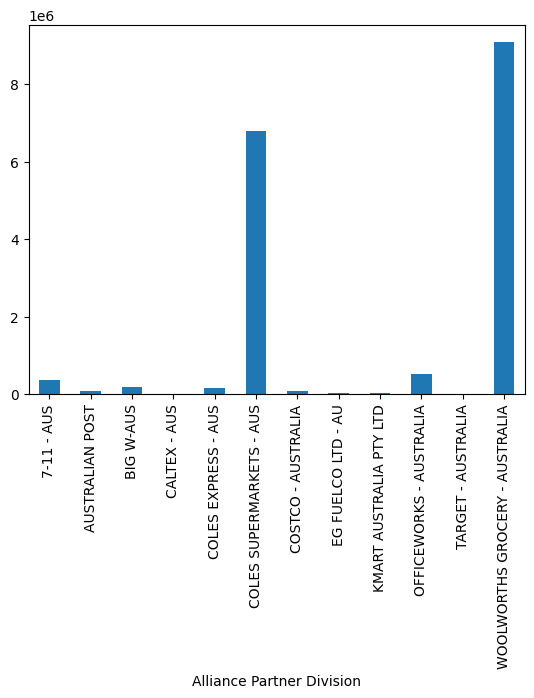

In [ ]:
#Visualization-
df.groupby(["Product"])["revenue"].sum()
df.groupby(["Alliance Partner Division"])["revenue"].sum().plot(kind="bar")


<Axes: ylabel='revenue'>

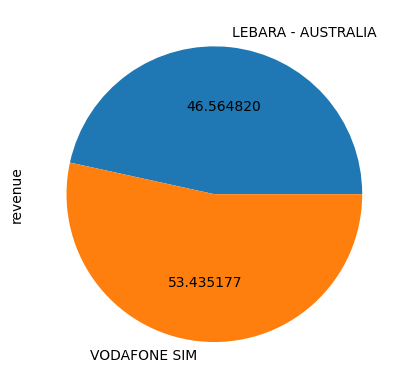

In [ ]:
#MARKET SHARE Card Partner Wise-
df.groupby(["Card Partner Division"])["revenue"].sum().plot(kind="pie",autopct="%2f")

<Axes: xlabel='month'>

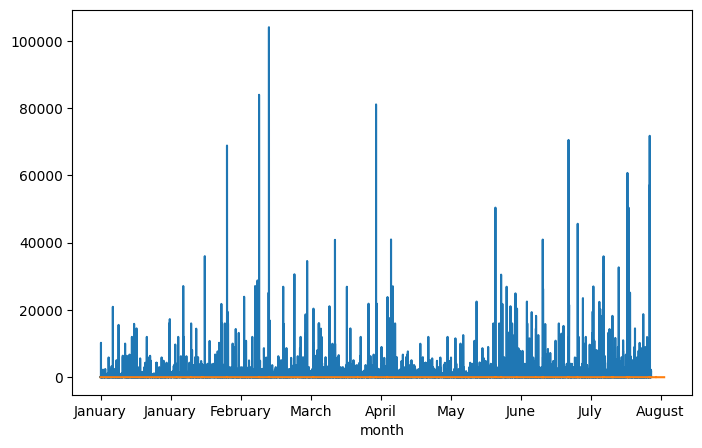

In [ ]:
#PLOTTING REVENUE TRENDS OVER TIME SERIES DATA-
df1= df.set_index(["month"])
df1["revenue"].plot(figsize=(8,5))

<Axes: xlabel='month'>

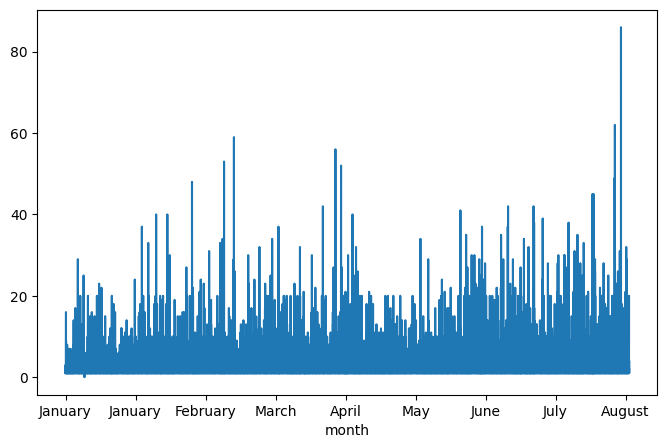

In [ ]:
df1["Sales Units"].plot(figsize=(8,5))

<Axes: xlabel='month'>

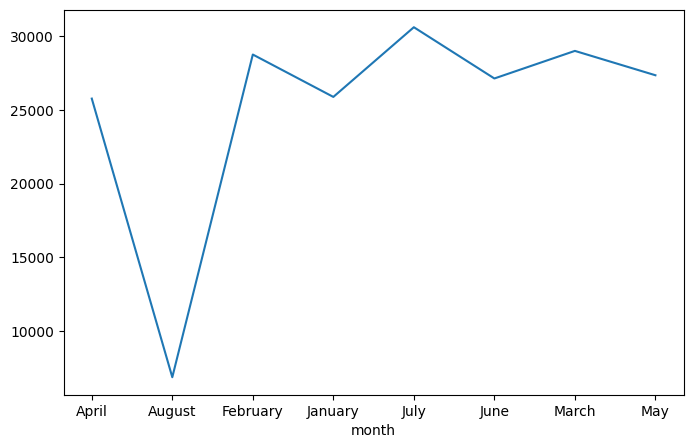

In [ ]:
df.groupby(["month"])["Card Partner Division"].count().plot(figsize=(8,5))

Card Partner Division
LEBARA - AUSTRALIA    8071647.70
VODAFONE SIM          9262570.25
Name: revenue, dtype: float64